# Softmax Regression Implementation from Scratch (Section 4.4)

Experiment with the hyperparameters of the code in this section. In particular:

A. Plot how the validation loss changes as you change the learning rate.

B. Do the validation and training loss change as you change the minibatch size? How
large or small do you need to go before you see an effect?

In [2]:
#!pip install d2l==1.0.3

# d2l importing
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

# libraries needed
import torch
from torch import nn
import d2l
from d2l import torch as d2l
import matplotlib.pyplot as plt

Mounted at /content/gdrive


# A. Changing Learning Rate

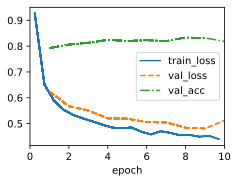

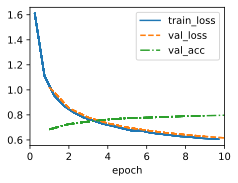

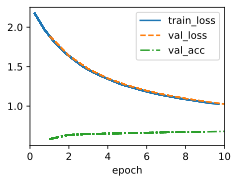

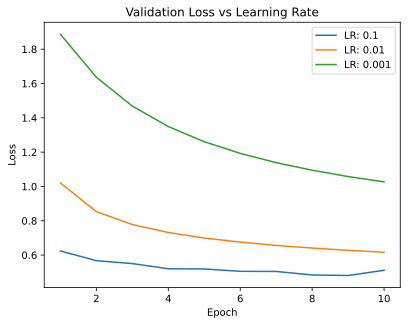

In [ ]:
# Define the Softmax Regression Model
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                              requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]

    def forward(self, X):
        X = X.reshape((-1, self.W.shape[0]))
        return nn.functional.softmax(torch.matmul(X, self.W) + self.b, dim=1)

# Function to calculate cross entropy loss
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[range(len(y_hat)), y]).mean()

# Adding loss function to the model
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

# Data loading
data = d2l.FashionMNIST(batch_size=256)

# Experiment with different learning rates
learning_rates = [0.1, 0.01, 0.001]
losses = []

for lr in learning_rates:
    # Create model instance with different learning rate
    model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=lr)
    trainer = d2l.Trainer(max_epochs=10)
    trainer.fit(model, data)

    # Calculate validation loss
    val_loss = model.board.data['val_loss']
    losses.append(val_loss)


plt.figure()

for lr, sublist in zip(learning_rates, losses):
    x_values = [point.x for point in sublist]
    y_values = [point.y for point in sublist]

    plt.plot(x_values, y_values, label=f'LR: {lr}')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()  # Automatically creates legend from the labels specified during plotting
plt.title('Validation Loss vs Learning Rate')
plt.show()

The smaller the learning rate the larger the loss is initially. As the model has to take smaller steps as it iterates throughout training. Problem 4 will evaluate how increasing the number of epochs may allow these learning rates to ultimately converge.  




# B. Changing minibatch size

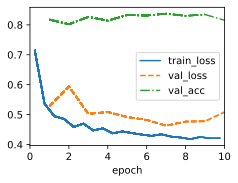

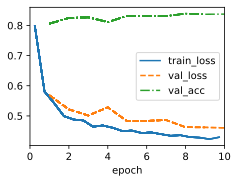

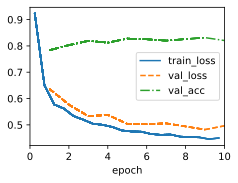

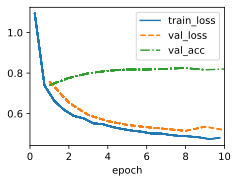

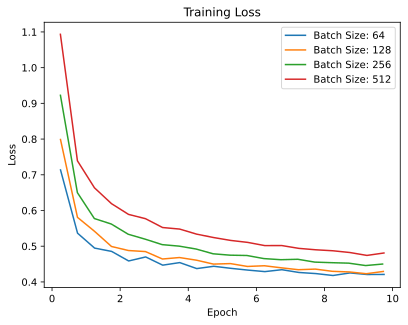

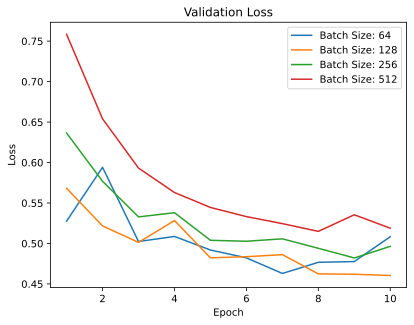

In [20]:
from torch import nn
# Define the Softmax Regression Model
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                              requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]

    def forward(self, X):
        X = X.reshape((-1, self.W.shape[0]))
        return nn.functional.softmax(torch.matmul(X, self.W) + self.b, dim=1)

# Function to calculate cross entropy loss
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[range(len(y_hat)), y]).mean()

# Adding loss function to the model
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

# Data loading

val_losses = []
train_losses = []
batch_sizeVec = [64,128,256,512]

# Experiment with different batch sizes
for bs in batch_sizeVec:
    data = d2l.FashionMNIST(batch_size=bs)

    # Create model instance with different learning rate
    model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
    trainer = d2l.Trainer(max_epochs=10)
    trainer.fit(model, data)

    # Calculate validation loss
    val_loss = model.board.data['val_loss']
    train_loss = model.board.data['train_loss']

    val_losses.append(val_loss)
    train_losses.append(train_loss)

# PLOTTING
# Define your sets of lines
sets_of_lines = [
    (train_losses, 'Training Loss'),
    (val_losses, 'Validation Loss')]

# Iterate through sets of lines and plot them accordingly
for lines, title in sets_of_lines:
    fig_num = sets_of_lines.index((lines, title)) % 2 + len(batch_sizeVec) + 2  # Alternate between figure 1 and figure 2
    plt.figure(fig_num)  # Switch to the appropriate figure

    # Iterate through each batch size and subplot data
    for bs, sublist in zip(batch_sizeVec, lines):
        x_values = [point.x for point in sublist]
        y_values = [point.y for point in sublist]

        plt.plot(x_values, y_values, label=f'Batch Size: {bs}')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{title}')
    plt.legend()  # Add legend for each figure

plt.show()


The validation and training loss most definetely change. Both losses start higher with the larger batch size. However they appear to approach convergence as the epochs increase. Especially for the validation loss the larger batch size promotes a more steady descent and less fluctuations in the validation loss size. In the small minibatches there are more variability in the graident estimates which might promote the noiser estimates seen. The power of two difference from the standard 256 seems to readily showcase differences in loss performance.

This question will be further explored in problem 4 which utilizes an increase number of epocshs to analyze the effects